In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

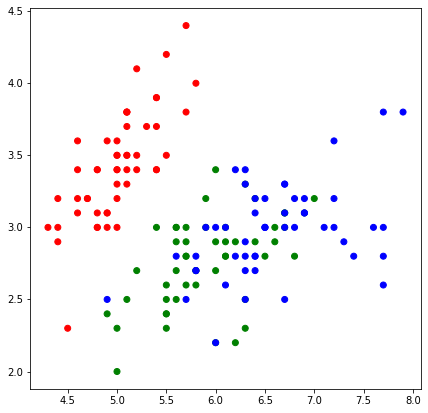

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

### Реализовываем дополнительную пару функций расчета метрики и графиков для обычной версии алгоритма и для алгоритмов с добавлением весов. 

In [3]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance), 1/np.sqrt(distance) if distance != 0 else 1

def e_metrics_w(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

### Реализуем три версии алгоритма: обычный и с добавлением весов по двум разным формулам:

1. $w(d) = \frac{1}{d}$

2. $w(d) = q^{d}$

In [4]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def knn_w(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = [] 
        
        for i in range(len(x_train)):
            distance = e_metrics_w(x, x_train[i])
            weight = 1/(distance**2)
            distance_w = weight    
            test_distances.append((distance_w, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[-k:]:
            classes[d[1]] += d[0]

        answers.append(sorted(classes, key=classes.get)[0])
    return answers

def knn_i(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = [] 
        
        for i in range(len(x_train)):
            distance = e_metrics_w(x, x_train[i])
            weight = i**distance
            distance_w = weight    
            test_distances.append((distance_w, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[-k:]:
            classes[d[1]] += d[0]

        answers.append(sorted(classes, key=classes.get)[0])
    return answers

In [5]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

### При k = 5 наиболее наглядны различия в работе алгоритмов.

In [6]:
k = 5
y_pred = knn(X_train, y_train, X_train, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_train):.3f}')

Точность алгоритма при k = 5: 0.808


In [7]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
    
def get_graph_w(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_w(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
    
def get_graph_i(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_i(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

### График алгоритма без весов:

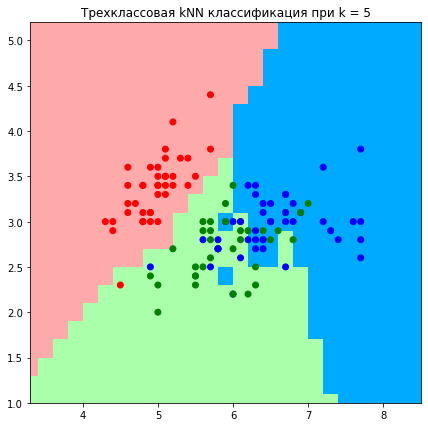

In [8]:
get_graph(X_train, y_train, k)

In [9]:
k = 5
y_pred = knn_w(X_train, y_train, X_train, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_train):.3f}')

Точность алгоритма при k = 5: 0.000


C:\Users\rfk03\AppData\Local\Temp\ipykernel_9372\485691642.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/(distance**2)


### График с весом $w(d) = \frac{1}{d}$

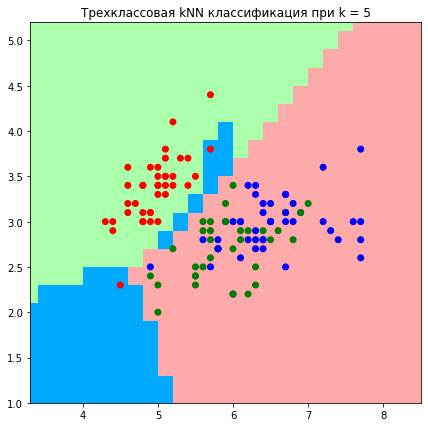

In [10]:
get_graph_w(X_train, y_train, k)

### Как видно из графика, вероятно имеет место быть d = 0, следовательно вес становится бесконечно большим, что приводит к переобучению, что видно по нулевой точности.

In [11]:
k = 5
y_pred = knn_i(X_train, y_train, X_train, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_train):.3f}')

Точность алгоритма при k = 5: 0.625


### График с весом  $w(d) = q^{d}$

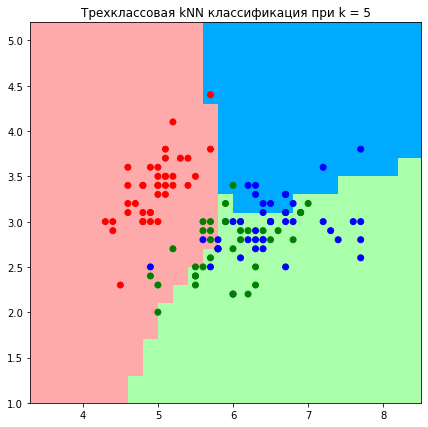

In [12]:
get_graph_i(X_train, y_train, k)

### При добавлении весов наблюдаются значительные отличия в построении областей отнесения точек к разным классам от обычного алгоритма. Также при добавлении веса точность становится хуже.